# Normalizing datasets for feature selection

Normalizing each of our variables in the UDS neuropsych battery to have mean 0 and a standard deviation of 1.

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import csv as csv
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LassoLarsCV, LassoCV, Lasso

In [2]:
data = pd.read_csv("../data/madb_intclasses_use.csv")

### data cleaning

In [3]:
data.columns = map(str.upper, data.columns)
data = data.dropna()
data['SEX']  = data['SEX_NUMBERIC'].map({1:1, 2:0})

In [4]:
target  = data.RAVLT_DEL
predvar = data.keys().tolist()
predvar.remove('SUBJECT')
predvar.remove('RAVLT_DEL')
predvar.remove('SEX_NUMBERIC')
predictors = data[predvar]

predictors.describe()

,CLASS,AGE,EDUCATION,ANIMALS,BNT_30,LM_1,LM_2,MMSE,TMT_A,TMT_B,...,C3_GAMMAPOWER_FIXED,O1_DELTAPOWER_FIXED,O1_THETAPOWER_FIXED,O1_ALPHAPOWER_FIXED,O1_ALPHA1POWER_FIXED,O1_ALPHA2POWER_FIXED,O1_ALPHA3POWER_FIXED,O1_BETAPOWER_FIXED,O1_GAMMAPOWER_FIXED,SEX
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,...,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,1.666667,78.846233,16.333333,21.685185,28.314815,14.703704,12.962963,29.055556,33.444444,88.074074,...,0.065749,2.545905,4.502322,8.790418,8.790418,12.264464,3.137243,0.620546,0.114608,0.314815
std,1.098885,6.584991,2.540242,5.820666,2.054209,4.232086,4.467759,0.940025,14.180330,36.715557,...,0.077557,2.453885,9.489112,12.592813,12.592813,18.129654,4.506768,0.510929,0.176609,0.468803
min,0.000000,64.273790,11.000000,7.000000,23.000000,7.000000,3.000000,27.000000,15.000000,25.000000,...,0.016112,0.527580,0.129930,0.082261,0.082261,0.075896,0.086967,0.069967,0.015885,0.000000
25%,1.000000,73.526512,14.000000,18.000000,28.000000,11.250000,10.000000,29.000000,23.000000,59.250000,...,0.028648,1.343550,0.611217,1.083975,1.083975,1.225450,0.647630,0.291725,0.049894,0.000000
50%,2.000000,80.447635,16.000000,21.000000,29.000000,15.000000,14.000000,29.000000,31.500000,85.500000,...,0.042307,1.824550,1.351650,3.669300,3.669300,3.658600,1.547900,0.466055,0.072349,0.000000
75%,3.000000,84.019162,18.000000,26.000000,30.000000,17.750000,16.000000,30.000000,38.000000,100.000000,...,0.063449,3.316100,3.467600,11.654875,11.654875,15.235175,3.514075,0.784692,0.105967,1.000000
max,3.000000,91.578370,22.000000,34.000000,30.000000,23.000000,23.000000,30.000000,90.000000,218.000000,...,0.447330,17.907300,49.923200,69.557300,69.557300,90.937200,27.360400,2.764200,1.250400,1.000000


#### Standardize predictors to have mean=0 and STD=1

In [5]:
from sklearn.preprocessing import scale

pred_scaled = predictors.copy()
for key in predictors:
    pred_scaled[key] = scale(predictors[key].astype('float64'))
    
pred_scaled.describe()

,CLASS,AGE,EDUCATION,ANIMALS,BNT_30,LM_1,LM_2,MMSE,TMT_A,TMT_B,...,C3_GAMMAPOWER_FIXED,O1_DELTAPOWER_FIXED,O1_THETAPOWER_FIXED,O1_ALPHAPOWER_FIXED,O1_ALPHA1POWER_FIXED,O1_ALPHA2POWER_FIXED,O1_ALPHA3POWER_FIXED,O1_BETAPOWER_FIXED,O1_GAMMAPOWER_FIXED,SEX
count,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,...,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01
mean,-6.167906e-17,3.577385e-16,4.893205e-16,-3.108367e-16,8.306113e-16,-1.356939e-16,-1.336380e-16,-1.706454e-15,1.398059e-16,-5.345518e-17,...,-2.261565e-17,-2.158767e-16,3.803542e-17,-8.018277e-17,-8.018277e-17,1.583096e-16,1.110223e-16,3.700743e-17,1.069104e-16,-2.549401e-16
std,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,...,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00
min,-1.530931e+00,-2.233758e+00,-2.119252e+00,-2.546629e+00,-2.611574e+00,-1.837401e+00,-2.250908e+00,-2.207235e+00,-1.312920e+00,-1.734042e+00,...,-6.460117e-01,-8.302252e-01,-4.651066e-01,-6.980113e-01,-6.980113e-01,-6.786129e-01,-6.831766e-01,-1.087723e+00,-5.642437e-01,-6.778344e-01
25%,-6.123724e-01,-8.154411e-01,-9.271726e-01,-6.390658e-01,-1.546925e-01,-8.237388e-01,-6.694151e-01,-5.965500e-02,-7.434606e-01,-7.924360e-01,...,-4.828586e-01,-4.945812e-01,-4.139103e-01,-6.177179e-01,-6.177179e-01,-6.146101e-01,-5.576037e-01,-6.496181e-01,-3.698657e-01,-6.778344e-01
50%,3.061862e-01,2.454732e-01,-1.324532e-01,-1.188213e-01,3.366838e-01,7.066928e-02,2.342953e-01,-5.965500e-02,-1.384102e-01,-7.076685e-02,...,-3.050898e-01,-2.967249e-01,-3.351479e-01,-4.104885e-01,-4.104885e-01,-4.791416e-01,-3.559685e-01,-3.052119e-01,-2.415292e-01,-6.778344e-01
75%,1.224745e+00,7.929399e-01,6.622662e-01,7.482529e-01,8.280601e-01,7.265686e-01,6.861504e-01,1.014135e+00,3.242754e-01,3.278694e-01,...,-2.992831e-02,3.168147e-01,-1.100670e-01,2.296035e-01,2.296035e-01,1.653978e-01,8.439972e-02,3.242879e-01,-4.938595e-02,1.475287e+00
max,1.224745e+00,1.951664e+00,2.251705e+00,2.135572e+00,8.280601e-01,1.978740e+00,2.267643e+00,1.014135e+00,4.025760e+00,3.571944e+00,...,4.966191e+00,6.318812e+00,4.831577e+00,4.870832e+00,4.870832e+00,4.380197e+00,5.425309e+00,4.235000e+00,6.491507e+00,1.475287e+00


In [7]:
skf = cross_validation.StratifiedKFold(y_aging, n_folds=6)

pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, 
                                                              test_size=.3, random_state=123)

model = LassoLarsCV(cv=6, precompute=False).fit(pred_train, tar_train)

/Users/jorge/anaconda/lib/python3.5/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 9 iterations, i.e. alpha=7.809e-02, with an active set of 9 regressors, and the smallest cholesky pivot element being 2.107e-08
  ConvergenceWarning)
/Users/jorge/anaconda/lib/python3.5/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 16 iterations, i.e. alpha=7.023e-02, with an active set of 12 regressors, and the smallest cholesky pivot element being 2.107e-08
  ConvergenceWarning)
/Users/jorge/anaconda/lib/python3.5/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 17 iterations, i.e. alpha=6.963e-02, with an active set of 13 regressors, and the smallest cholesky pivot element being 2.107e-08
  ConvergenceWarning)
/Users/jorge/anaco

In [7]:
# Nicely prints coefficients of linear models [0].
# [0]: http://blog.datadive.net/selecting-good-features-part-ii-linear-models-and-regularization/
def prettyprint(coefs, names=None, sort=False, n_coefs=20):
#     if names == None:
#         names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst, key = lambda x:-np.abs(x[0]))
    return " + \n".join("%s * %s" % (round(coef, 3), name) for coef, name in lst)

In [12]:
print(prettyprint(model.coef_, predictors.columns, sort=True))

0.547 * ANIMALS + 
0.171 * O1_ALPHATHETARATIO + 
0.0 * CLASS + 
0.0 * AGE + 
0.0 * EDUCATION + 
0.0 * BNT_30 + 
0.0 * LM_1 + 
0.0 * LM_2 + 
0.0 * MMSE + 
0.0 * TMT_A + 
0.0 * TMT_B + 
0.0 * DSPAN_B + 
0.0 * DSPAN_F + 
0.0 * DSYMBOL + 
0.0 * LEARNER + 
0.0 * RB1_ACC + 
0.0 * RB1_RT + 
0.0 * RB1_ACC_F + 
0.0 * RB1_F_RT + 
0.0 * RB1_N_ACC + 
0.0 * RB1_N_RT + 
0.0 * RB2_ACC + 
0.0 * RB2_RT + 
0.0 * RB2_ACC_F + 
0.0 * RB2_F_RT + 
0.0 * RB2_N_ACC + 
0.0 * RB2_N_RT + 
0.0 * RB_CHECK_F_ACC + 
0.0 * RB_CHECK_N_ACC + 
0.0 * RB_CHECK_TOTAL_ACC + 
0.0 * GNG_GO_HR + 
0.0 * GNG_GO_MISS + 
0.0 * GNG_NOGO_CR + 
0.0 * GNG_NOGO_FA + 
0.0 * GNG_GO_RT + 
0.0 * GNG_NOGOINCORR_RT + 
0.0 * C19_TF + 
0.0 * C19_IAF + 
0.0 * C19_ALPHA32RATIO + 
0.0 * C19_ALPHA32RATIO_FIXED + 
0.0 * C19_ALPHATHETARATIO + 
0.0 * C19_ALPHATHETARATIO_FIXED + 
0.0 * C19_DELTAPOWER + 
0.0 * C19_THETAPOWER + 
0.0 * C19_ALPHAPOWER + 
0.0 * C19_ALPHA1POWER + 
0.0 * C19_ALPHA2POWER + 
0.0 * C19_ALPHA3POWER + 
0.0 * C19_DELTAPOWER_FIXED +

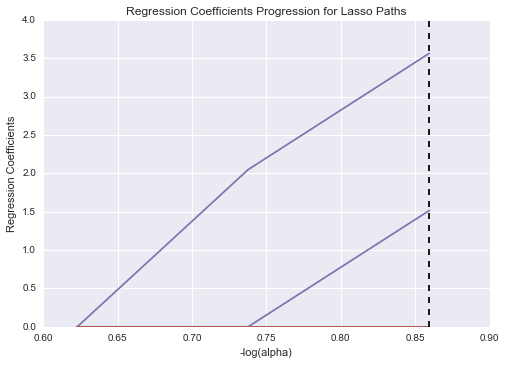

In [9]:
# plot coefficient progression
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

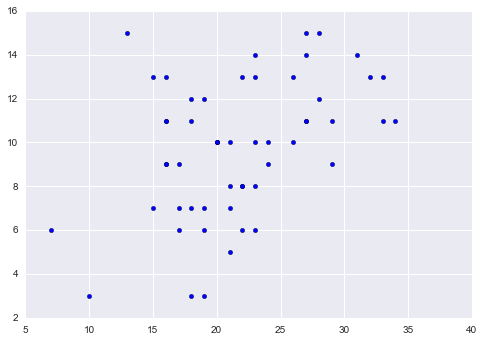

In [14]:
plt.scatter(data['ANIMALS'], data['RAVLT_DEL'])

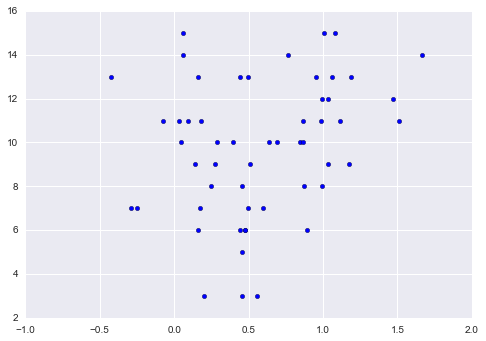

In [19]:
plt.scatter(np.log10(data['O1_ALPHATHETARATIO']), data['RAVLT_DEL'])

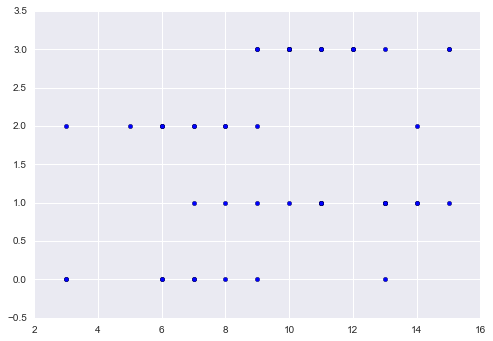

In [8]:
plt.scatter(data['RAVLT_DEL'], data['CLASS'])

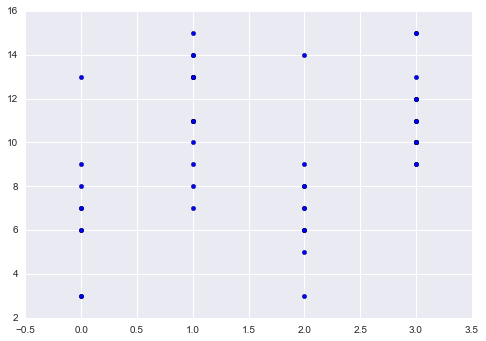

In [9]:
plt.scatter(data['CLASS'], data['RAVLT_DEL'])